In [1]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
import src.data_prep as data
import src.models.KNN as KNN
import src.config.feature_def as feature_def
import src.models.utils as utils

In [2]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")

In [3]:
feature_cols = feature_def.FEATURE_NSI_3M

results, best = KNN.knn_hparam_search(
    monthly,
    feature_cols,
    "NSI",
    k_values = list(range(1, 51, 2)),
    weight_options=["uniform", "distance"],
    metric_options=["euclidean", "manhattan"]
)

best

{'k': 25,
 'weights': 'distance',
 'metric': 'manhattan',
 'R2': 0.8119245400304478,
 'RMSE': 0.05611609584451055,
 'MAE': 0.04192489782993022}

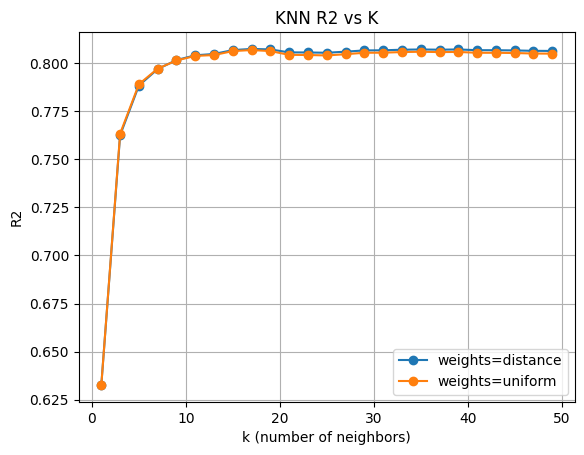

In [4]:
KNN.plot_knn_metric_vs_k(results, metric="R2")

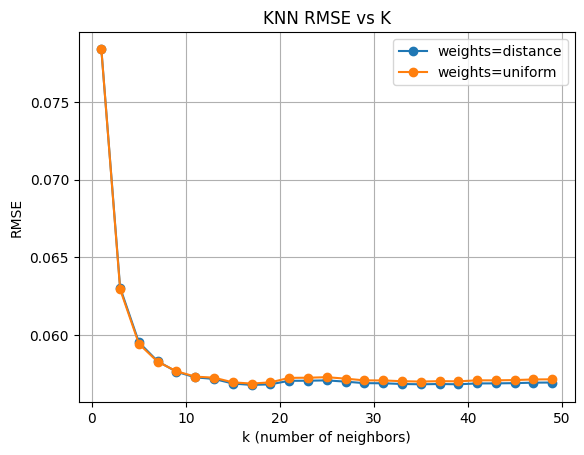

In [5]:
KNN.plot_knn_metric_vs_k(results, metric="RMSE")